- Scenario:
Environmental authorities want to estimate future pollution severity in urban regions but lack complete monitoring infrastructure.

- Objective:
Develop a model using features such as PM10, PM2.5, NO₂ concentration to understand the pollution index at particular point of time.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [2]:
df = pd.read_csv(r"C:\Desktop\predictiveAnalysis\data\processed\processed_data.csv")

In [3]:
df.head()

,who_region,iso3,country_name,city,year,pm10_concentration,pm25_concentration,no2_concentration,pm10_tempcov,pm25_tempcov,...,type_of_stations,population,latitude,longitude,who_ms,pollution_index,pollution_per_person,pollution_index_yearly_change,pollution_cluster,pollution_severity
0,0.0,0.0,0.0,1.0,2013,-0.170206,-0.354191,0.504059,-0.317035,-2.475293,...,9,0.649804,43.367900,-8.418571,1,-0.095652,-0.041423,0.000000,6,Critical
1,0.0,0.0,0.0,1.0,2014,-0.002639,-0.023508,0.067105,0.260630,-0.169461,...,9,0.663666,43.368033,-8.418233,1,0.008241,-0.042623,2.702171,6,Critical
2,0.0,0.0,0.0,1.0,2015,-0.080175,-0.164766,0.215932,0.389000,-1.102774,...,9,0.663666,43.370375,-8.422900,1,-0.049060,-0.042222,-1.490347,6,Critical
3,0.0,0.0,0.0,1.0,2016,-0.177362,-0.228385,0.096767,0.389000,0.379546,...,9,0.663666,43.370375,-8.422900,1,-0.168826,-0.042543,-3.115034,0,Low
4,0.0,0.0,0.0,1.0,2017,-0.027430,-0.156475,0.159910,0.324815,0.324645,...,9,0.663666,43.370375,-8.422900,1,-0.010575,-0.042373,4.116002,6,Critical


In [4]:
X = df[["pm10_concentration", "no2_concentration", "pm25_concentration", "year"]]
y = df["pollution_index"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## BaseLine Linear Model

In [5]:
lr = LinearRegression()
model_lr = lr.fit(X_train, y_train)

lr_pred = model_lr.predict(X_test)

In [6]:
print(f"Mean squared error : {mean_squared_error(lr_pred, y_test):.2f}")
print(f"r2_score: {r2_score(lr_pred, y_test): .2f}")

Mean squared error : 0.00
r2_score:  1.00


- The baseline model achieved an R² score of 1.0 due to the pollution index being a deterministic linear combination of the input pollutant variables. This resulted in target leakage, making the model unsuitable for real-world prediction.

## Optimized Model

In [7]:
model_xb = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5)
model_xb.fit(X_train, y_train)

xb_pred = model_xb.predict(X_test)

In [8]:
print(f"Mean squared error : {mean_squared_error(xb_pred, y_test):.2f}")
print(f"r2_score: {r2_score(xb_pred, y_test): .2f}")

Mean squared error : 0.14
r2_score:  0.86


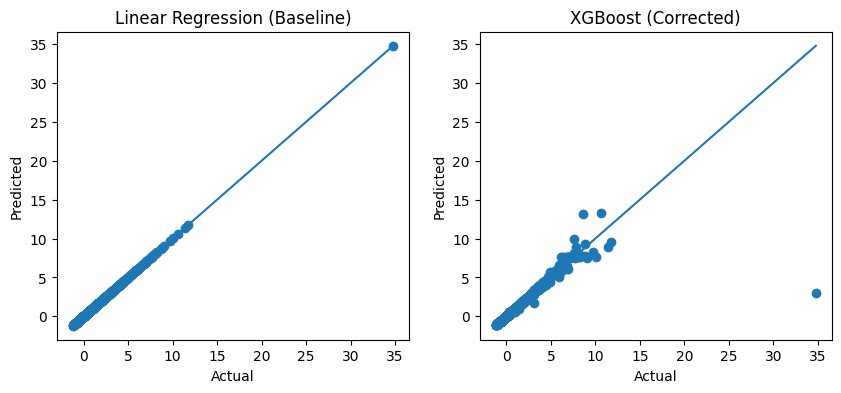

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Baseline Linear Regression
ax[0].scatter(y_test, lr_pred)
ax[0].plot([y_test.min(), y_test.max()],
           [y_test.min(), y_test.max()])
ax[0].set_title("Linear Regression (Baseline)")
ax[0].set_xlabel("Actual")
ax[0].set_ylabel("Predicted")

# XGBoost Regression
ax[1].scatter(y_test, xb_pred)
ax[1].plot([y_test.min(), y_test.max()],
           [y_test.min(), y_test.max()])
ax[1].set_title("XGBoost (Corrected)")
ax[1].set_xlabel("Actual")
ax[1].set_ylabel("Predicted")

plt.show()


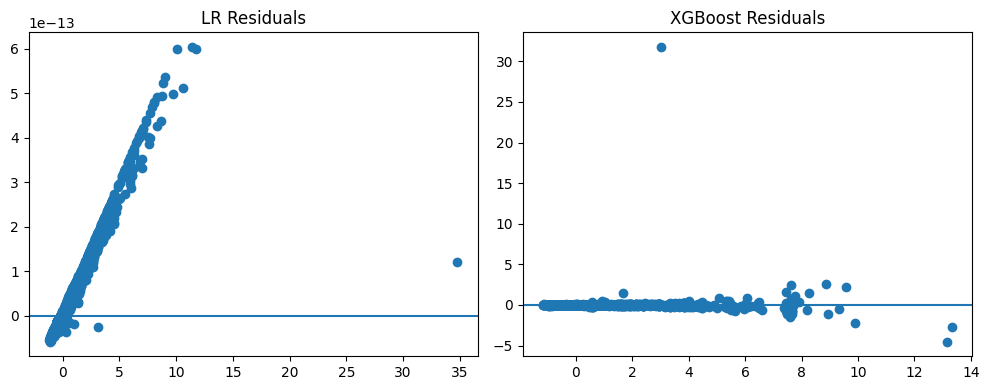

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Linear Regression residuals
ax[0].scatter(lr_pred, y_test - lr_pred)
ax[0].axhline(0)
ax[0].set_title("LR Residuals")

# XGBoost residuals
ax[1].scatter(xb_pred, y_test - xb_pred)
ax[1].axhline(0)
ax[1].set_title("XGBoost Residuals")

plt.tight_layout()
plt.show()


- The comparison plots show that Linear Regression trivially fits the pollution index due to leakage, while XGBoost demonstrates realistic predictive behavior.

In [11]:
joblib.dump(model_xb, "../models/xgb_pollution_index_model.pkl")

['../models/xgb_pollution_index_model.pkl']